一维薛定谔方程：
$$i\hbar\frac{\partial\Psi}{\partial t} =-\frac{\hbar^2}{2m}\frac{\partial^2  \Psi}{\partial x^2} +V\Psi$$
因式分解，波函数分为空间部分和时间部分：
$$ \Psi (x,t) = \psi(x)f(t) $$
$$f(t)=e^{-iEt/\hbar}$$
$$ \frac{-\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} +V\psi=E\psi$$
有限差分方法(FDM)中用于近似二阶偏导数的三点模板
对 $\psi_{i+1}$,$\psi_{i-1}$ 进行泰勒展开
在有限差分方法中，我们常常使用泰勒展开的前几项来近似函数的导数
$$ \psi(x_{i+1})=\psi(x_i)+\psi'(x_i) (\Delta x) + \frac12\psi''(x_i)(\Delta x)^2 +O((\Delta x)^3) $$
$$ \psi(x_{i-1})=\psi(x_i)-\psi'(x_i) (\Delta x) + \frac12\psi''(x_i)(\Delta x)^2 -O((\Delta x)^3) $$
上面两式相加
$$ \psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})=\psi''(x_i)(\Delta x)^2+O((\Delta x)^3) $$
$$ \psi''(x_i)=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2}-\frac{O((\Delta x)^3)}{(\Delta x)^2}=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2}-O(\Delta x) $$
$$ \psi''(x_i)\approx \frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2} $$
$\Delta x$越小，数据越精准
所以有:
$$ \frac{\partial^2 \psi_{i}}{\partial x^2}=\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(\Delta x)^2} $$ 
将上式代入薛定谔方程
$$ -\frac{\hbar^2}{2m}(\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(\Delta x)^2})+V_i\psi_i=E\psi_i $$
$$ -\frac{1}{2(\Delta x)^2}(\psi_{i-1} +(-2-(\frac{2m}{\hbar^2}(\Delta x)^2V_i))\psi_i+\psi_{i+1})=\frac{m}{\hbar^2}E\psi_i$$
$$ -\frac{1}{2(\Delta x)^2}\psi_{i-1}+\frac{1}{(\Delta x)^2}\psi_i +\frac{m}{\hbar^2} V_i\psi_i -\frac{1}{2(\Delta x)^2}\psi_{i+1}=\frac{m}{\hbar^2}E\psi_i $$
为数值分析更为方便精确，这里我们替换为无量纲形式：$\Delta y=\frac{\Delta x}{L},\hbar=1$，即：
$$-\frac{1}{2(\Delta y)^2}\psi_{i-1}+\frac{1}{(\Delta y)^2}\psi_i +mL^2 V_i\psi_i -\frac{1}{2(\Delta y)^2}\psi_{i+1}=mL^2E\psi_i$$
写成矩阵形式，此处使用无限深方势阱的边界条件$\psi_0=0,\psi_N=0$，后续把势能调高以模拟无限深方势阱的情况
$$
\begin{bmatrix}
\frac{1}{(\Delta y)^2}+mL^2V_1 & -\frac{1}{2(\Delta y)^2} & 0 & \cdots & 0 \\
-\frac{1}{2(\Delta y)^2} & \frac{1}{(\Delta y)^2}+mL^2V_2&-\frac{1}{2(\Delta y)^2} &\cdots & 0\\
0 &-\frac{1}{2(\Delta y)^2} & \frac{1}{(\Delta y)^2}+mL^2V_3&\cdots &0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&0 &-\frac{1}{2(\Delta y)^2} & \frac{1}{(\Delta y)^2}+mL^2V_{N-1}\\
\end{bmatrix}
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
=mL^2E
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
$$
可知$$\hat H=\hat T +\hat V$$
所以动能算符
$$\hat T=
-\frac{1}{2(\Delta y)^2}
\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$
$$ \hat V=mL^2
\begin {bmatrix}
V_1&0&0&\cdots&0\\
0&V_2&0&\cdots&0\\
0&0&V_3&\cdots&0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&\cdots&\cdots&0&V_{N-1}\\
\end{bmatrix}
$$

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [30]:
# 设定N,dx,y
N=2000
dx=1.0/N
x=np.linspace(0,1,N+1)  #由于是\psi_0到\psi_N，所以是N+1个点
print(f'x坐标离散点分布为:{x}')
print(f'x坐标离散点个数为:{len(x)}')

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001


In [31]:
# def mL2V(x):
#     return 1000*(x-1/2)**2 
#无限深势阱是理想模型，此处通过足够深的有限势能模拟无限深势阱，使得波函数在边界处为0

# 高斯函数
# def mL2V(x):
#     return 1000*np.exp(-(x-0.7)**2/(2*0.05**2))

# 无限深势阱
def mL2V(x):
    return 0*x

V=mL2V(x)
print(f'势能V(x)分布为:{V}')
print(f'势能V(x)个数为:{len(V)}')

势能V(x)分布为:[0. 0. 0. ... 0. 0. 0.]
势能V(x)个数为:2001


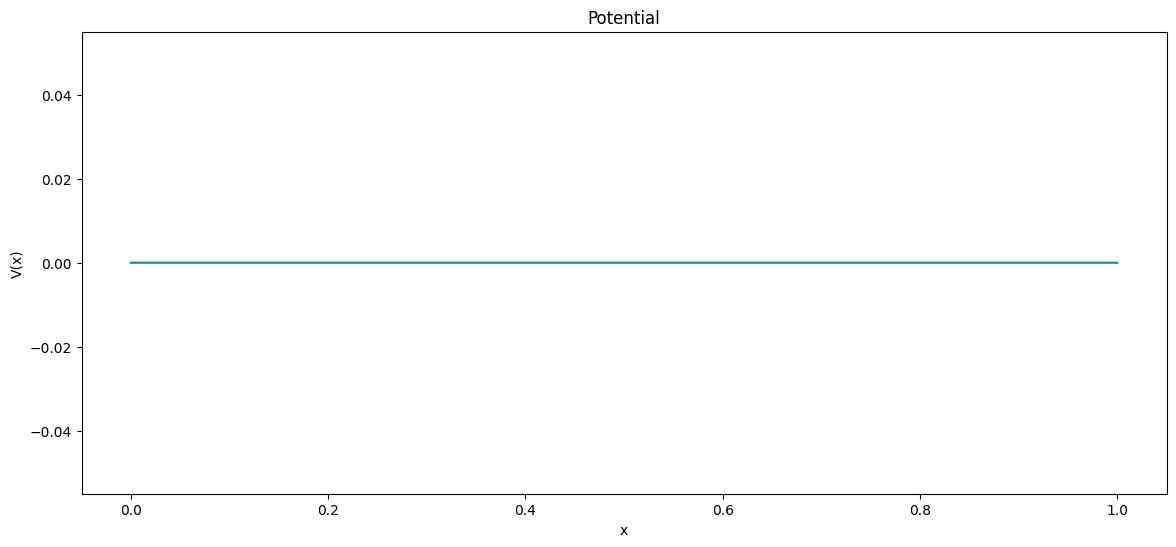

In [32]:
plt.figure(figsize=(14,6))
plt.plot(x,V)
plt.title('Potential')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

In [33]:
d=1/dx**2+mL2V(x)[1:-1]
e=-1/(2*dx**2)*np.ones(len(d)-1)

In [34]:
w,v=eigh_tridiagonal(d,e)
print(f'特征值w为:{w}')
print(f'特征函数v为:{v.T}')

特征值w为:[4.93480119e+00 1.97391926e+01 4.44131376e+01 ... 7.99995559e+06
 7.99998026e+06 7.99999507e+06]
特征函数v为:[[ 4.96729209e-05  9.93457192e-05  1.49018272e-04 ...  1.49018272e-04
   9.93457192e-05  4.96729209e-05]
 [-9.93457192e-05 -1.98690458e-04 -2.98033236e-04 ...  2.98033236e-04
   1.98690458e-04  9.93457192e-05]
 [ 1.49018272e-04  2.98033236e-04  4.47041581e-04 ...  4.47041581e-04
   2.98033236e-04  1.49018272e-04]
 ...
 [ 1.49018272e-04 -2.98033236e-04  4.47041581e-04 ...  4.47041581e-04
  -2.98033236e-04  1.49018272e-04]
 [ 9.93457192e-05 -1.98690458e-04  2.98033236e-04 ... -2.98033236e-04
   1.98690458e-04 -9.93457192e-05]
 [-4.96729209e-05  9.93457192e-05 -1.49018272e-04 ... -1.49018272e-04
   9.93457192e-05 -4.96729209e-05]]


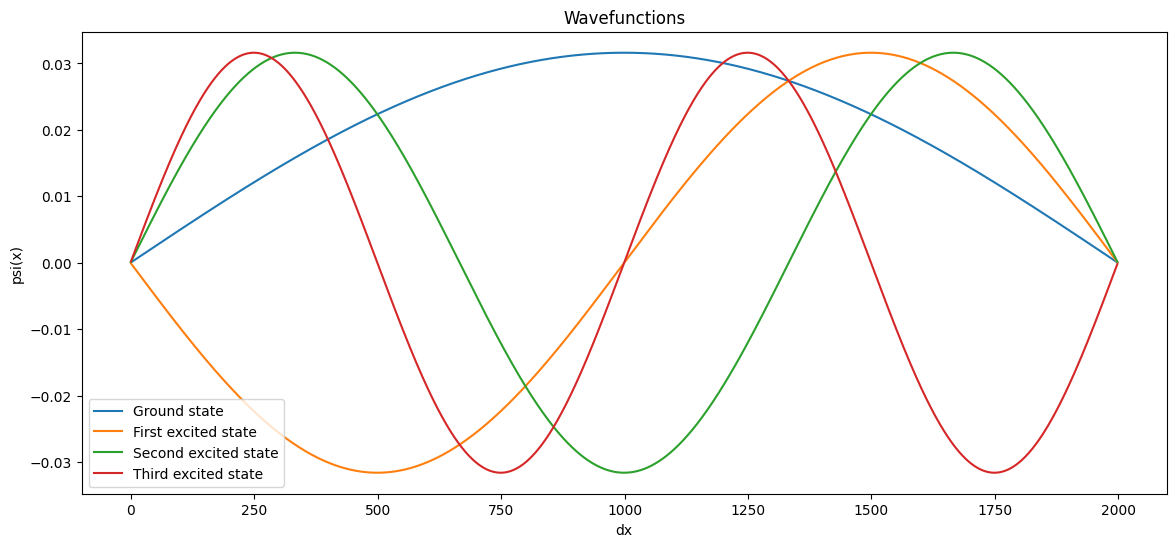

In [35]:
plt.figure(figsize=(14,6))
plt.plot(v.T[0],label='Ground state')
plt.plot(v.T[1],label='First excited state')
plt.plot(v.T[2],label='Second excited state')
plt.plot(v.T[3],label='Third excited state')
plt.title('Wavefunctions')
plt.xlabel('dx')
plt.ylabel('psi(x)')
plt.legend()
plt.show()

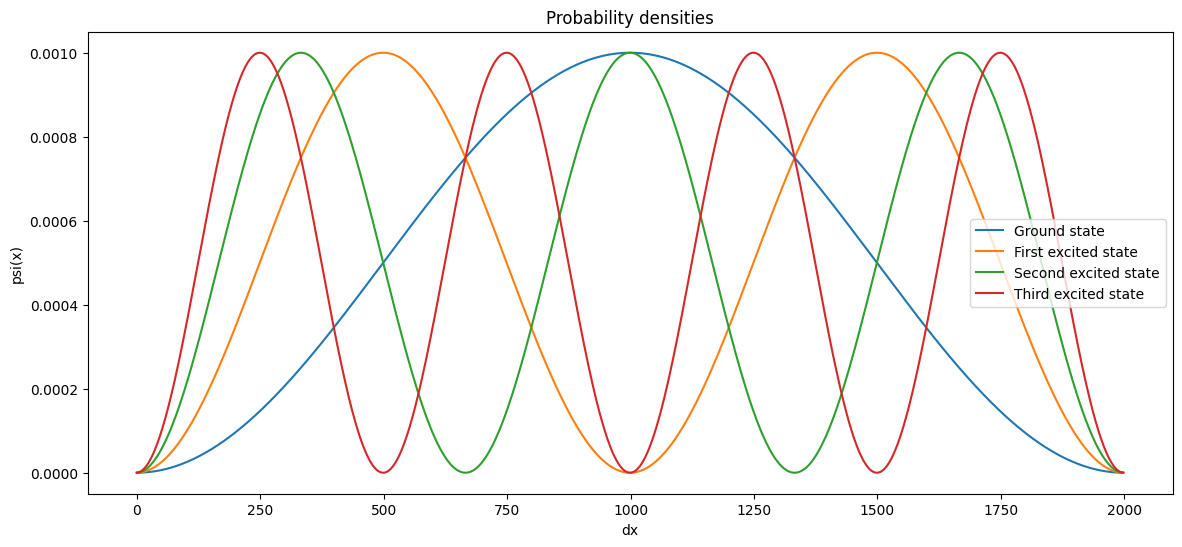

In [36]:
plt.figure(figsize=(14,6))
plt.plot(v.T[0]**2,label='Ground state')
plt.plot(v.T[1]**2,label='First excited state')
plt.plot(v.T[2]**2,label='Second excited state')
plt.plot(v.T[3]**2,label='Third excited state')
plt.title('Probability densities')
plt.xlabel('dx')
plt.ylabel('psi(x)')
plt.legend()
plt.show()

Text(0, 0.5, 'mL^2 E')

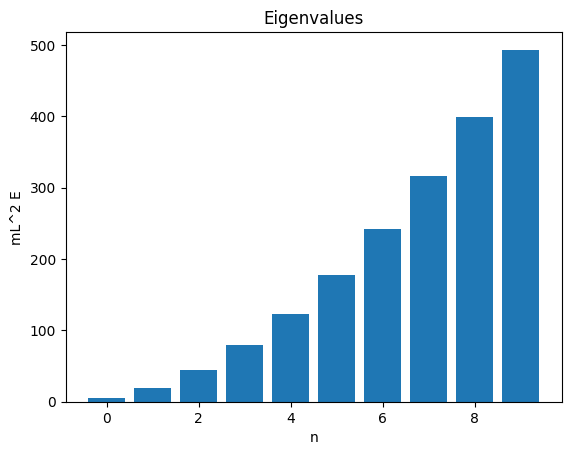

In [37]:
plt.bar(np.arange(0,10,1),w[0:10])
plt.title('Eigenvalues')
plt.xlabel('n')
plt.ylabel('mL^2 E')

In [38]:
def solve_and_plot(potential_func,N=2000,dx=1.0/2000):
    """
    解决一维薛定谔方程并作图
    
    参数：
    potential_func:势能函数,接收一个numpy数组并返回一个相同长度的numpy数组
    N:离散点个数
    dx:离散步长
    
    """
    # 初始化x坐标，计算势能
    x=np.linspace(0,1,N+1)
    V=potential_func(x)
    print(f'x坐标离散点分布为:{x}')
    print(f'x坐标离散点个数为:{len(x)}')
    
    # 计算矩阵元素
    d=1/dx**2+potential_func(x)[1:-1]
    e=-1/(2*dx**2)*np.ones(len(d)-1)
    
    # 解特征值问题获取能级和波函数
    w,v=eigh_tridiagonal(d,e)
    
    for i in range(9):
        print(f'第{i}个能级差为{w[i+1]-w[i]}')
    
    # 作图
    # 势能图
    plt.figure(figsize=(14, 6))
    plt.plot(x, V, label='Potential V(x)')
    plt.title('Potential')
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.show()
    
     # 波函数图
    plt.figure(figsize=(14, 6))
    for i in range(4):  # 绘制前四个态
        plt.plot(v.T[i], label=f'{i}th state')
    plt.title('Wavefunctions')
    plt.xlabel('dx')
    plt.ylabel('psi(x)')
    plt.legend()
    plt.show()
    
    # 概率密度图
    plt.figure(figsize=(14, 6))
    for i in range(4):  # 绘制前四个态的概率密度
        plt.plot(v.T[i]**2, label=f'{i}th state')
    plt.title('Probability densities')
    plt.xlabel('dx')
    plt.ylabel('|psi(x)|^2')
    plt.legend()
    plt.show()
    
      # 能级图
    plt.figure(figsize=(14, 6))
    plt.bar(np.arange(0,10,1), w[:10])
    plt.title('Eigenvalues')
    plt.xlabel('n')
    plt.ylabel('Energy')
    # 添加虚线
    for i in range(10):
        plt.axhline(w[i], color='black', linestyle='--', linewidth=0.5)
    # 添加能级数值
    for i in range(10):
        plt.text(i-0.5, w[i], f'{w[i]:.2f}', fontsize=8)
    plt.show()
    # 检查特征向量正交性
    A=np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            A[i,j]=sum(v[:,i]*v[:,j])
    plt.imshow(A)
    plt.colorbar()
    plt.title('Orthogonality')
    plt.xlabel('i')
    plt.ylabel('j')
    plt.show()
    

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为37.56472244591324
第1个能级差为43.71144538003355
第2个能级差为17.969107008369505
第3个能级差为84.52151751134964
第4个能级差为105.76578747509672
第5个能级差为38.424389407134925
第6个能级差为86.80082110612688
第7个能级差为142.3856471045778
第8个能级差为104.5288995932699


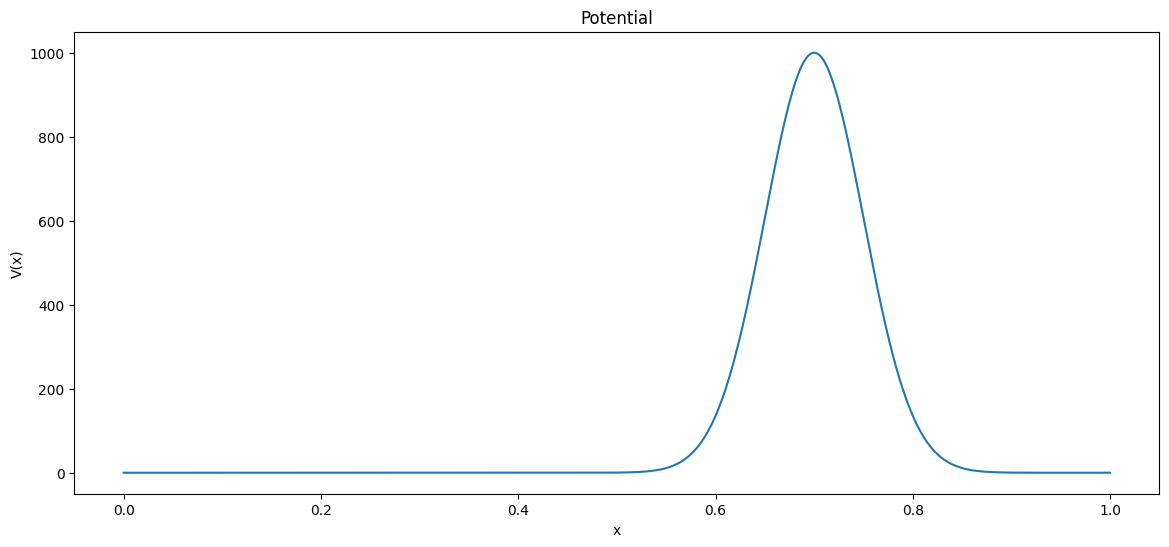

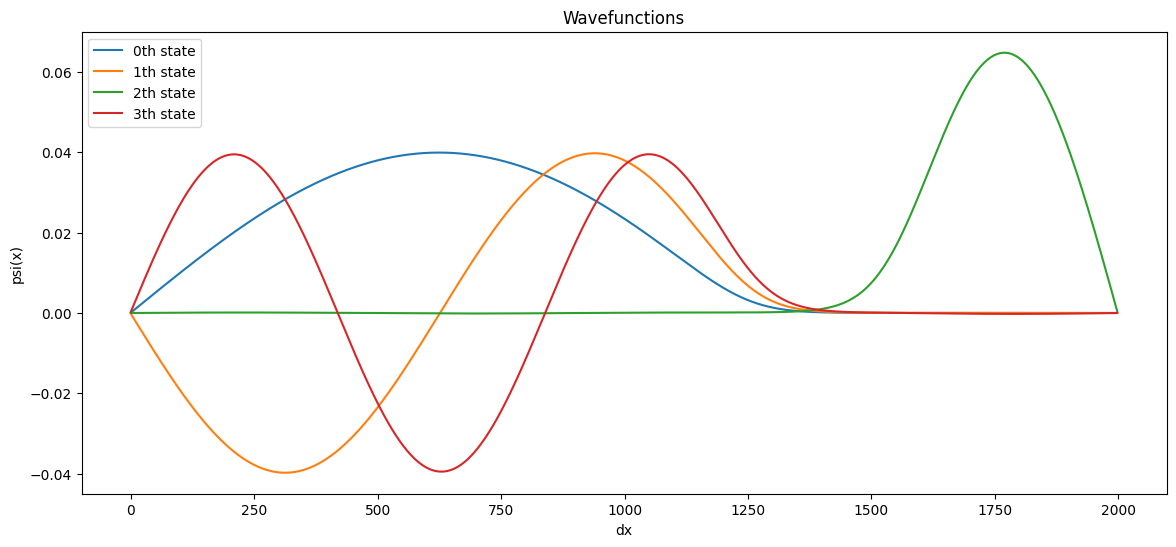

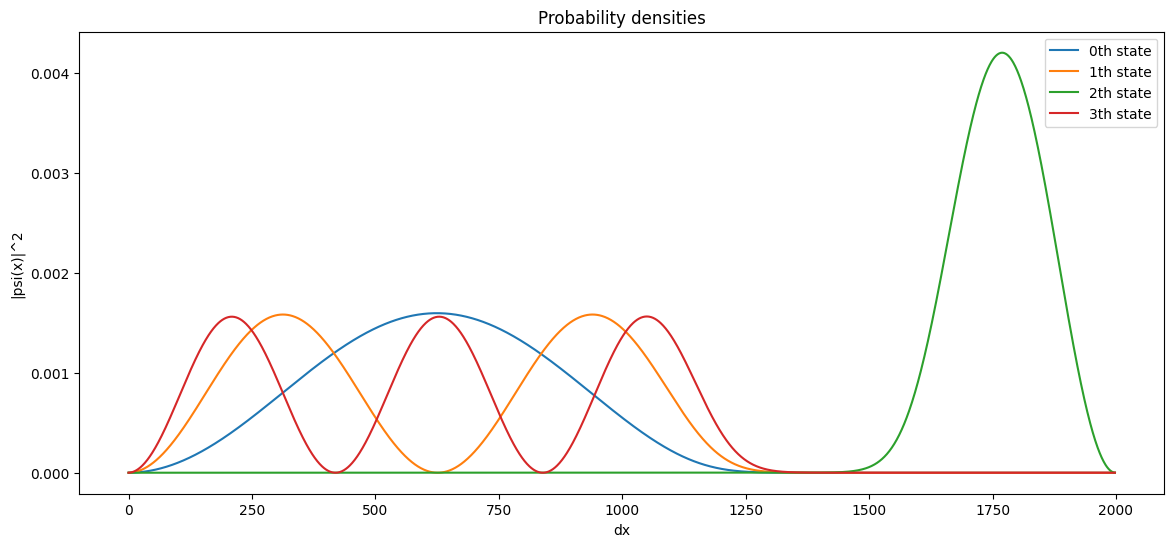

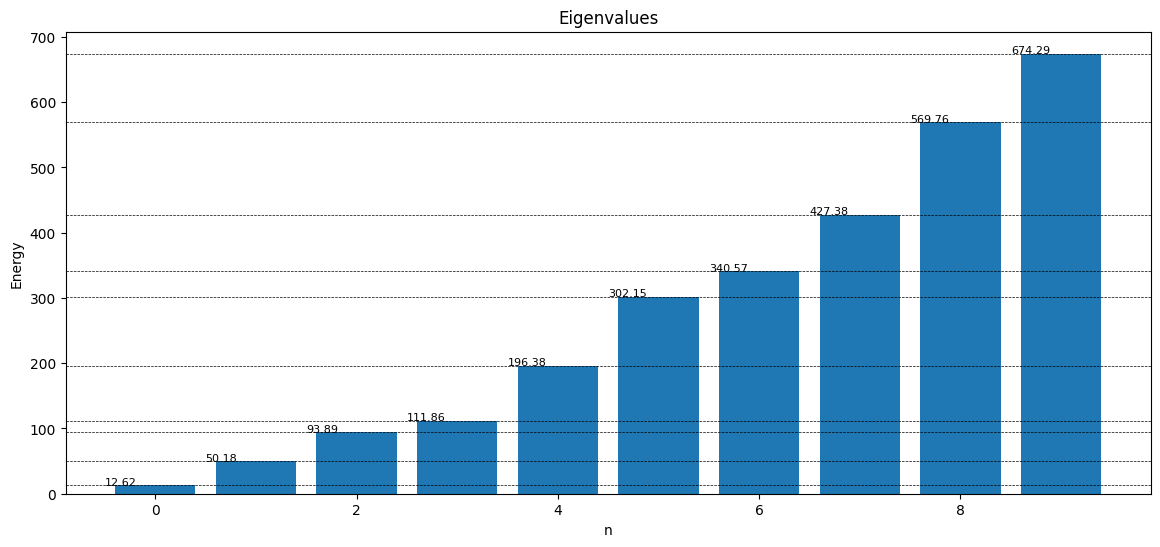

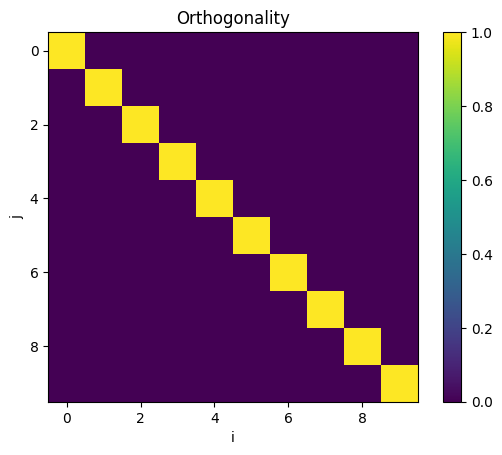

In [39]:
#Gaussian potential
def Gaussian_Potential(x):
    return 1000*np.exp(-(x-0.7)**2/(2*0.05**2))

solve_and_plot(Gaussian_Potential)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为44.763681729871976
第1个能级差为45.071743082331054
第2个能级差为46.379578683655296
第3个能级差为49.81320506079069
第4个能级差为55.9463294343426
第5个能级差为64.21925367398359
第6个能级差为73.61251549108437
第7个能级差为83.42365111571849
第8个能级差为93.34991150711863


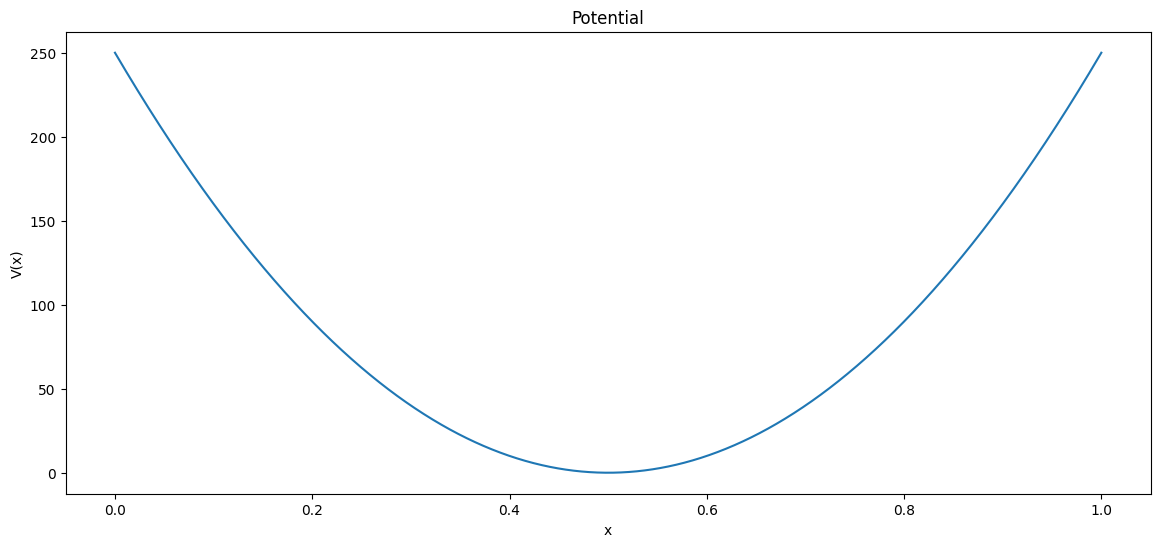

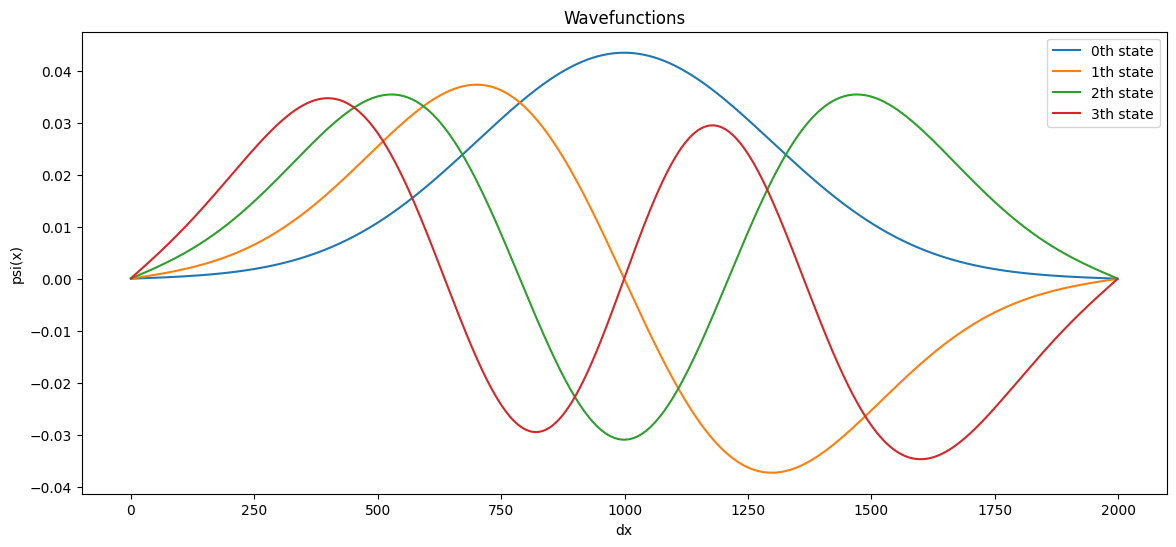

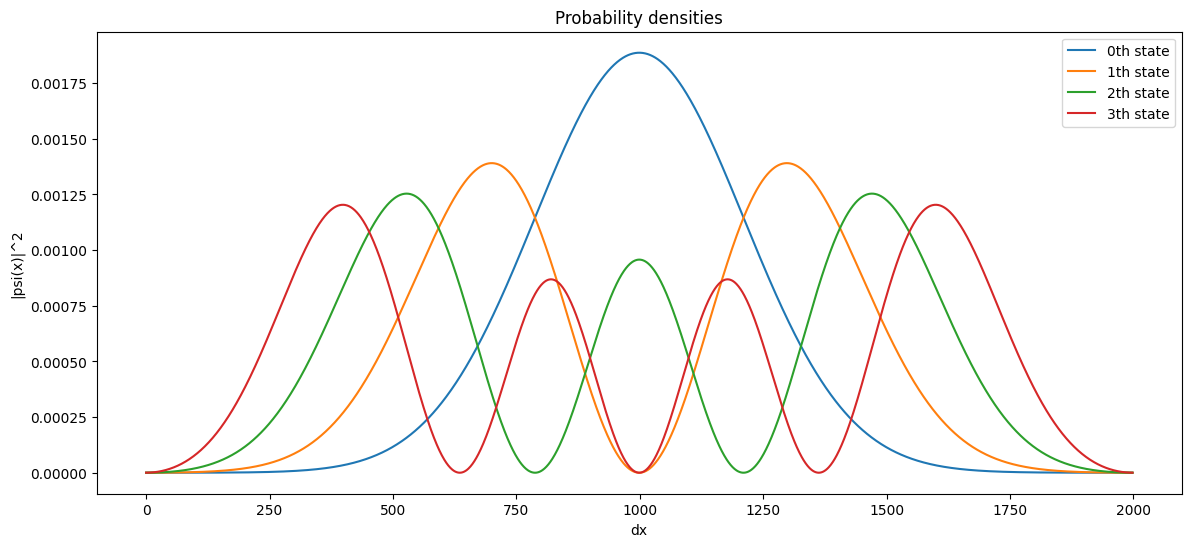

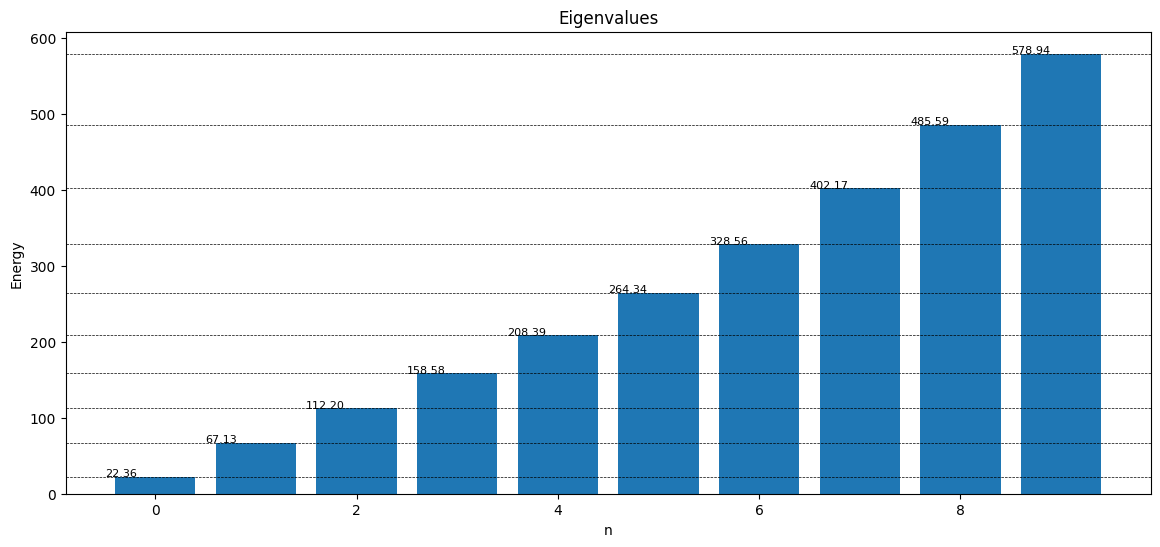

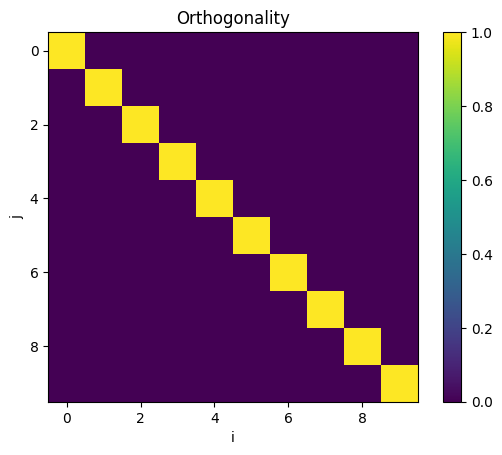

In [40]:
# Harmonic potential
def Harmonic_Potential(x):
    return 1000*(x-1/2)**2
solve_and_plot(Harmonic_Potential)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为14.804391381586175
第1个能级差为24.673945048849106
第2个能级差为34.54343783515877
第3个能级差为44.41284538988761
第4个能级差为54.2821433598569
第5个能级差为64.15130739369246
第6个能级差为74.0203131408386
第7个能级差为83.88913625008945
第8个能级差为93.75775237187611


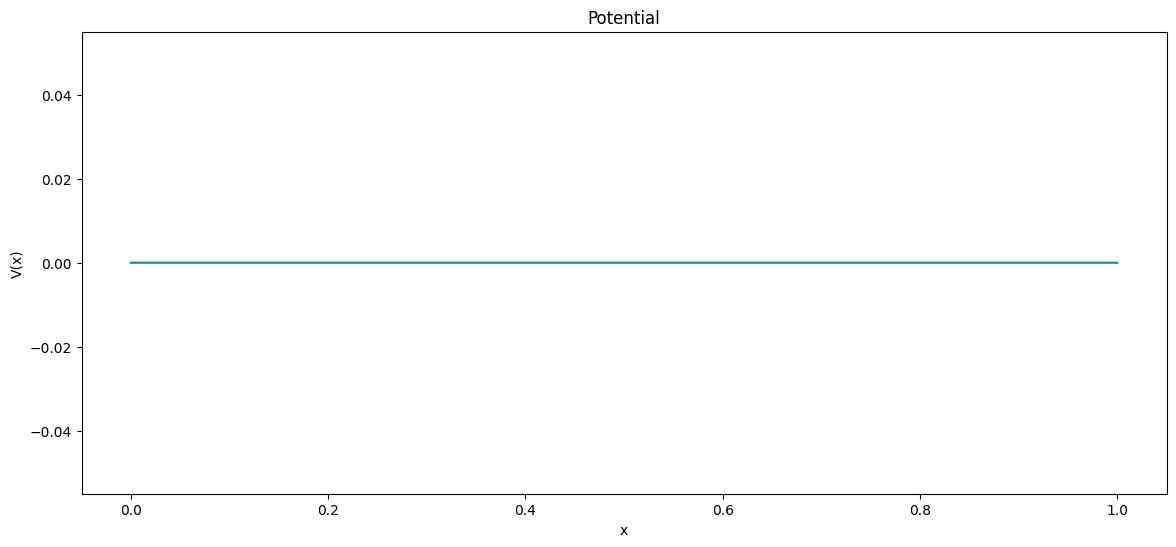

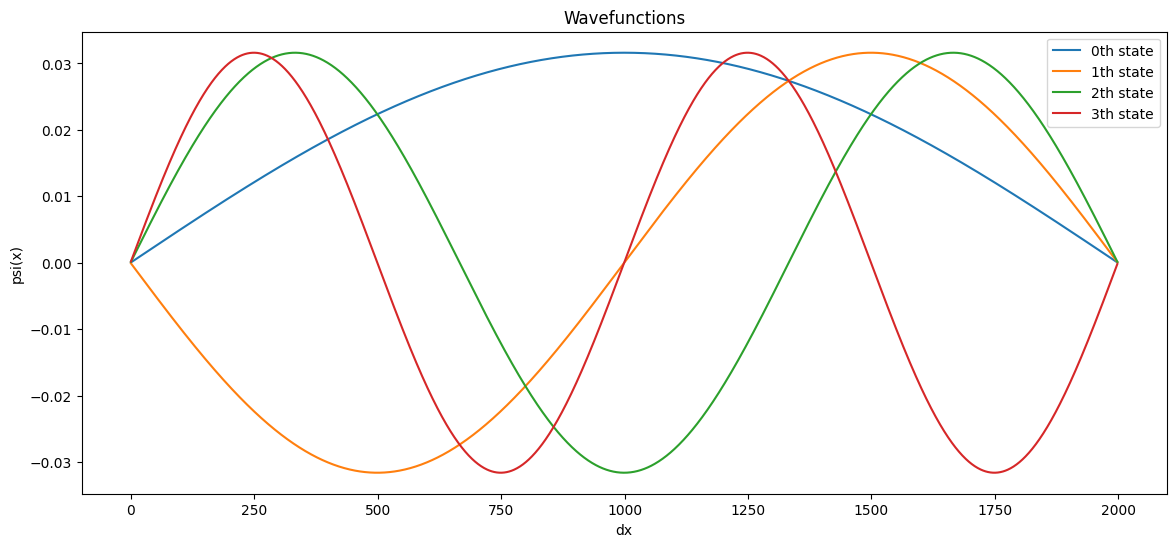

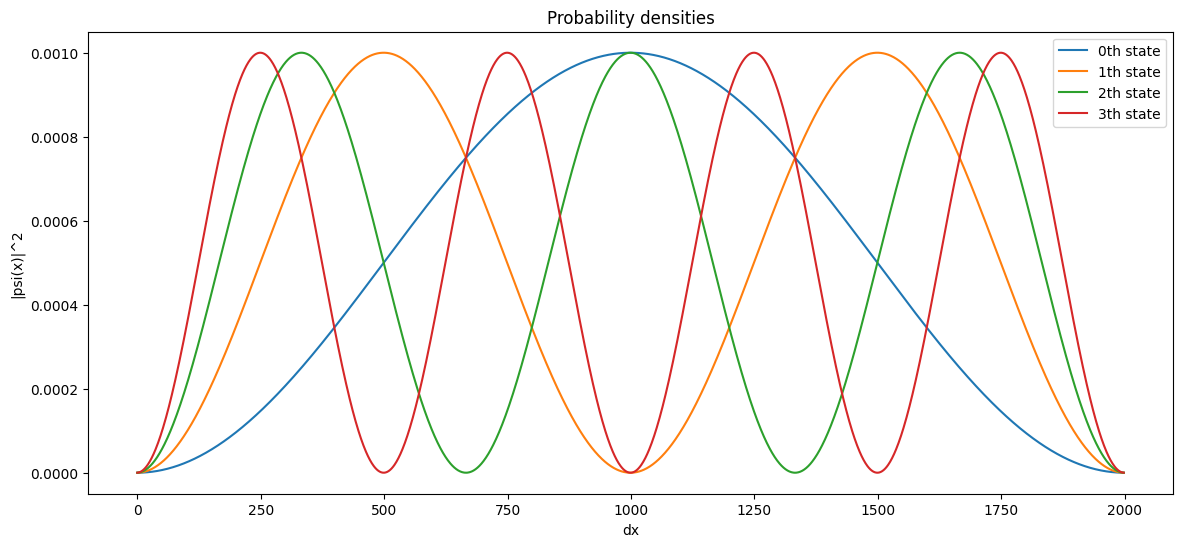

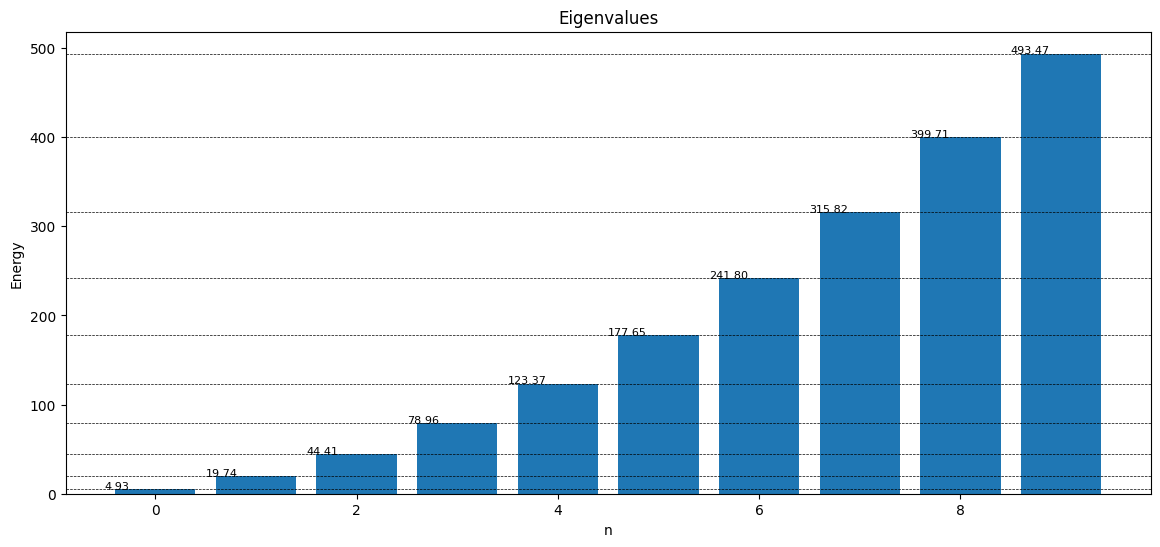

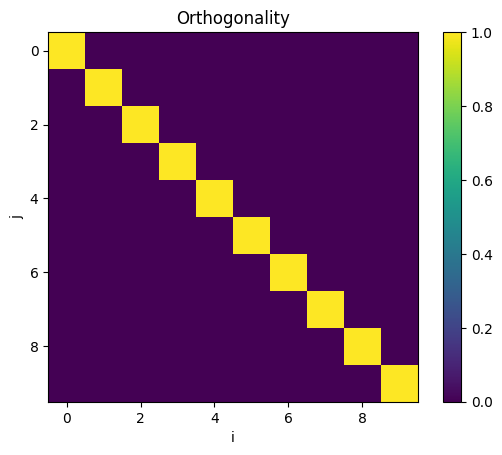

In [41]:
# Infinite square well
def Infinite_Square_Well(x):
    return 0*x
solve_and_plot(Infinite_Square_Well)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为87.4918674773507
第1个能级差为71.63026601658467
第2个能级差为63.311322315365686
第3个能级差为58.02882216435441
第4个能级差为55.86099778351189
第5个能级差为59.82609753976379
第6个能级差为69.35856514737611
第7个能级差为80.39178920423956
第8个能级差为91.23845440382422


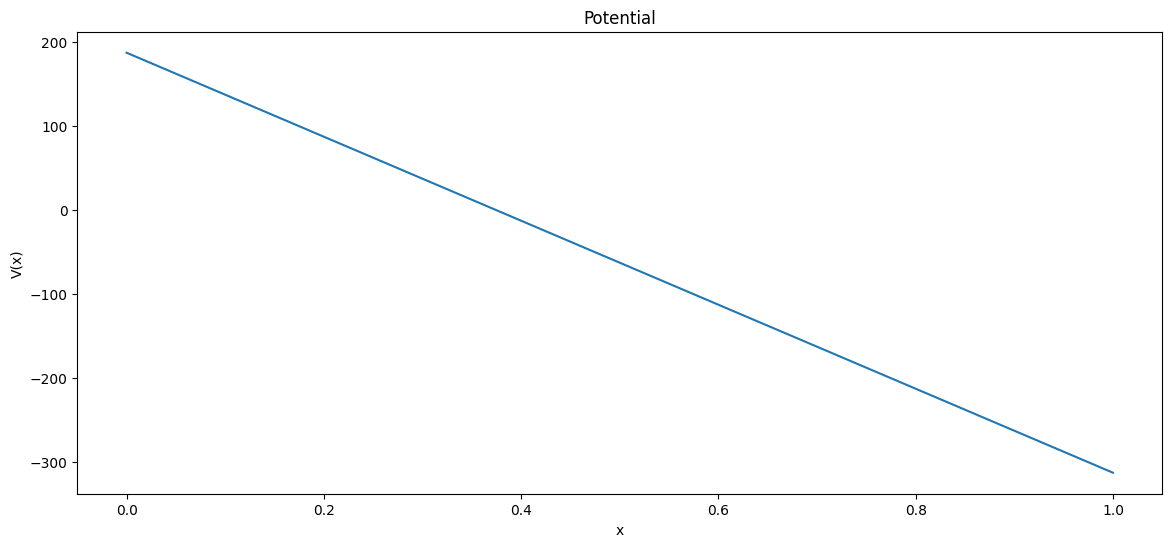

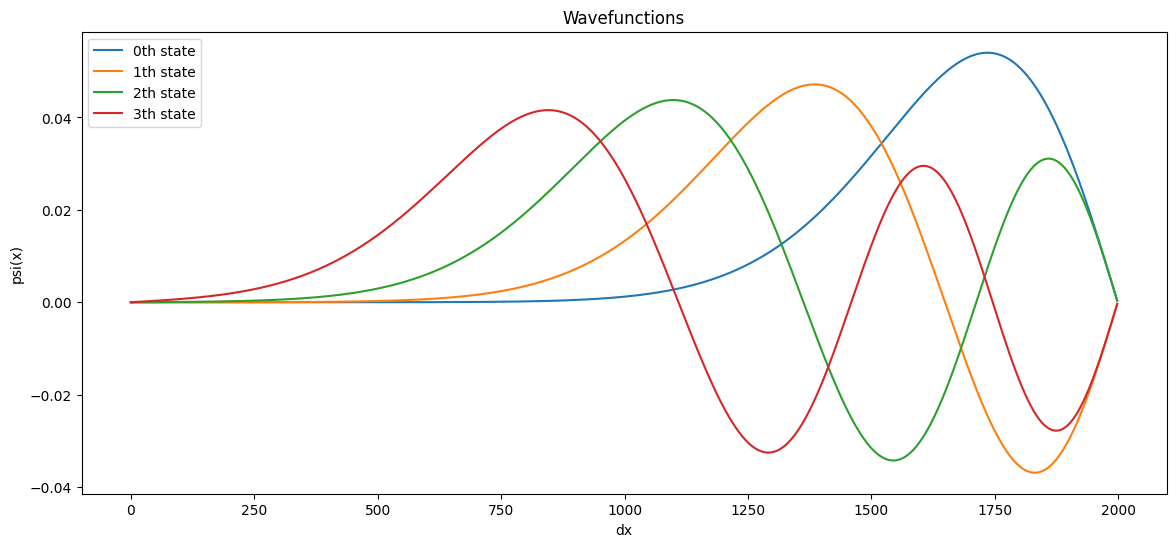

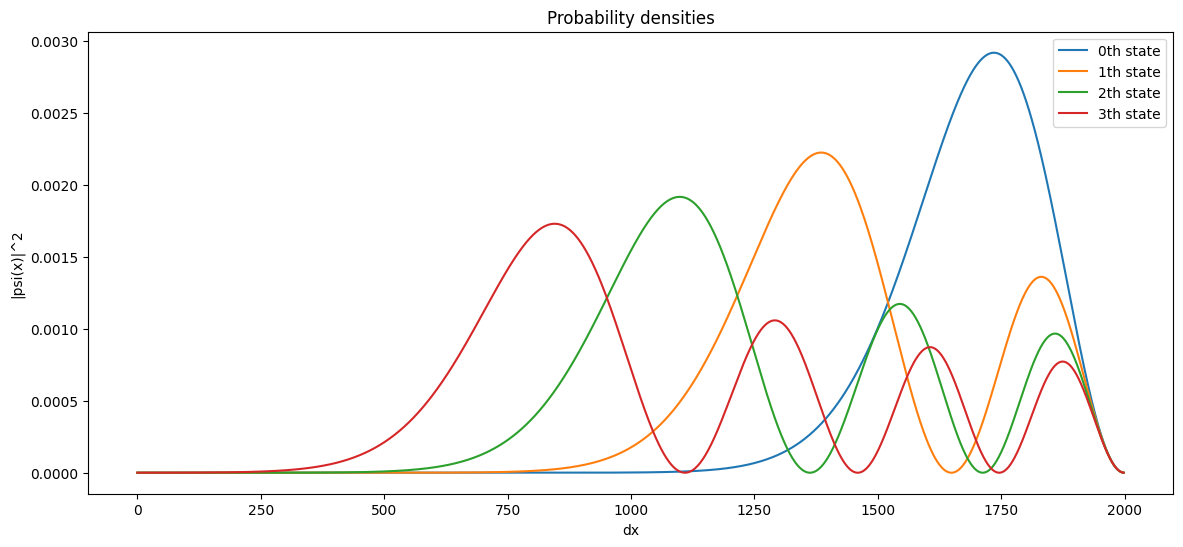

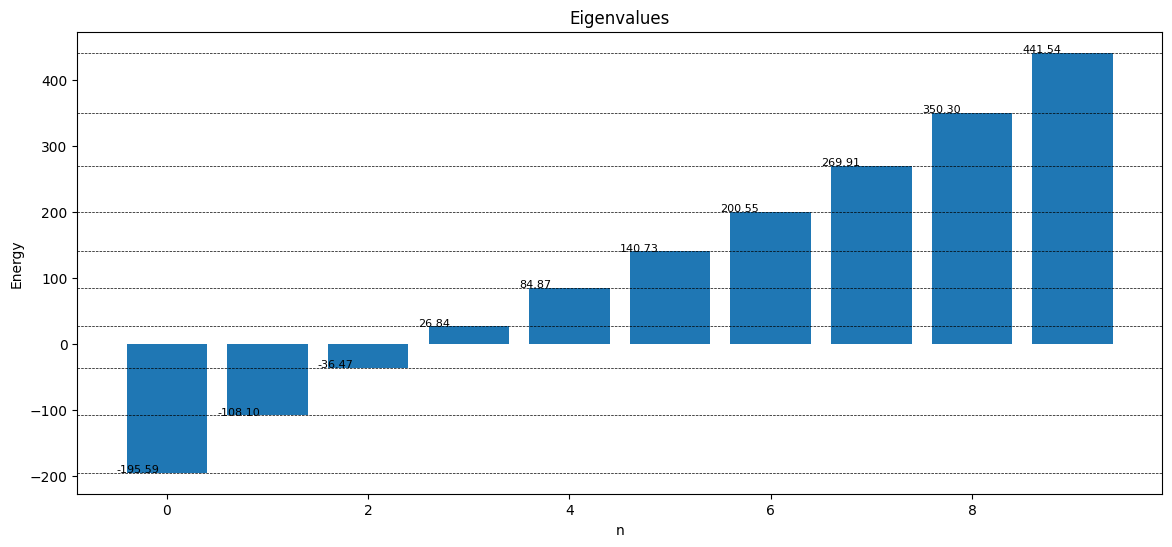

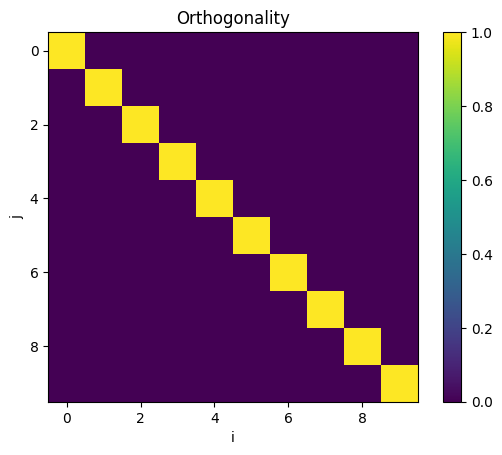

In [42]:
# Double well
def Double_Well(x):
    return 1000*(x-1/2)**2-1000*(x-1/4)**2
solve_and_plot(Double_Well)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为43.90540761113789
第1个能级差为44.260660754142464
第2个能级差为47.45547548981085
第3个能级差为53.06350868818481
第4个能级差为59.489216119275284
第5个能级差为66.51261965018068
第6个能级差为74.54775048390479
第7个能级差为83.57158202302514
第8个能级差为93.19087005812332


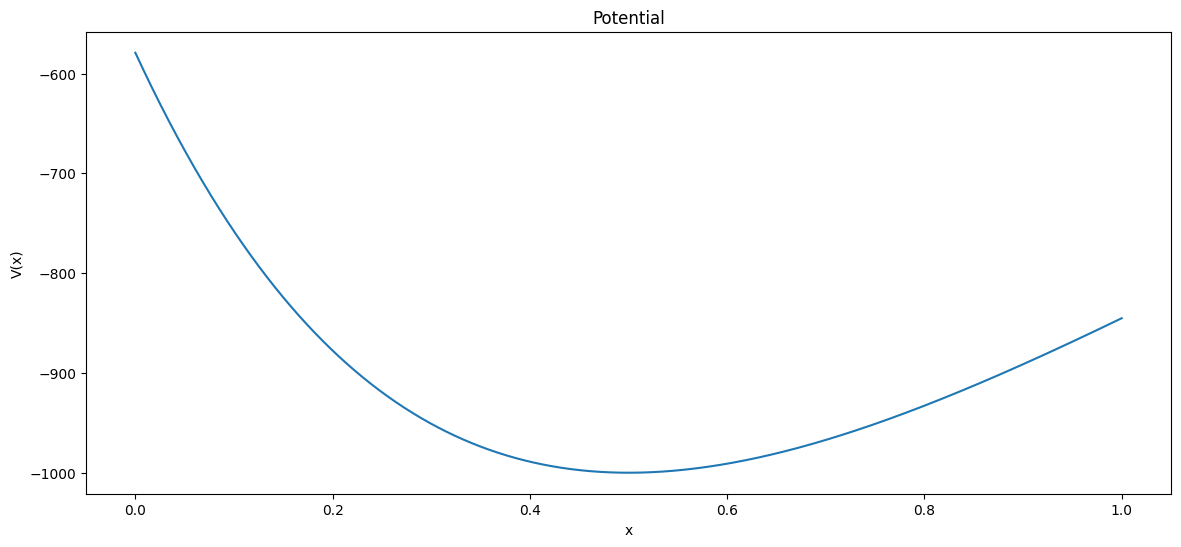

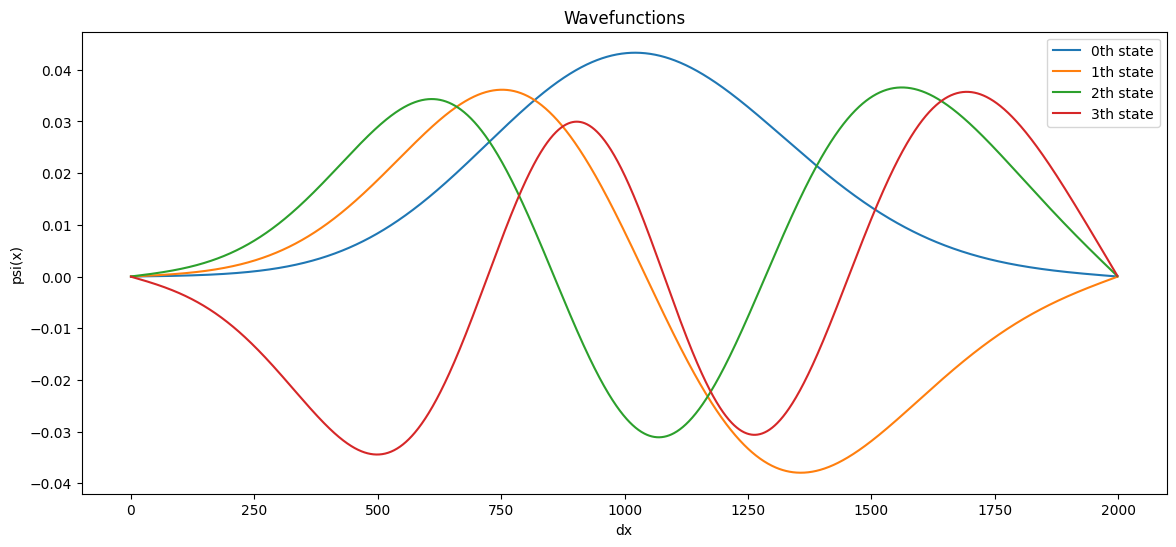

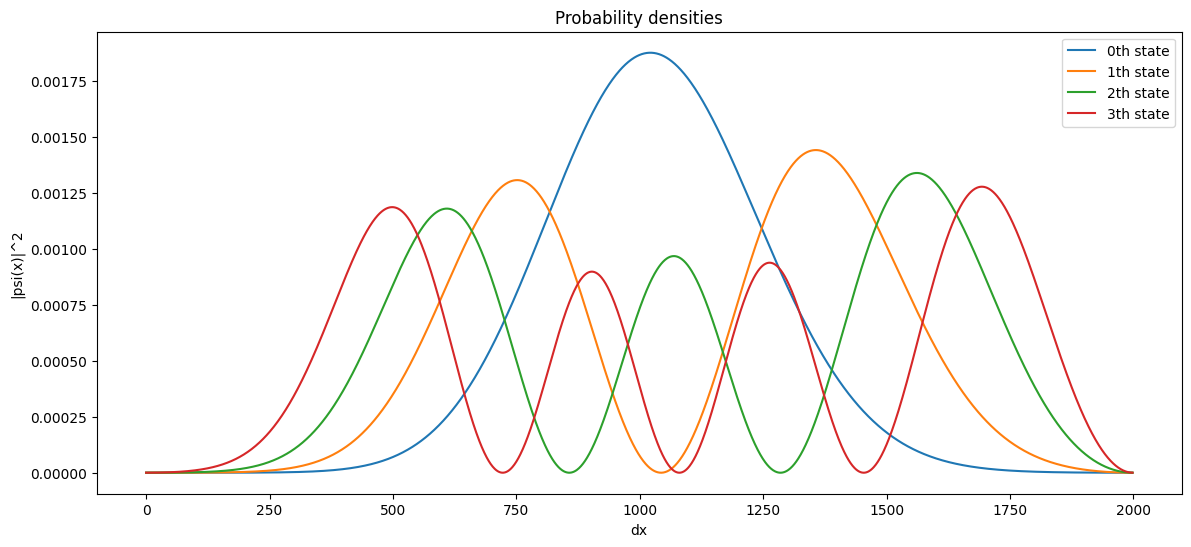

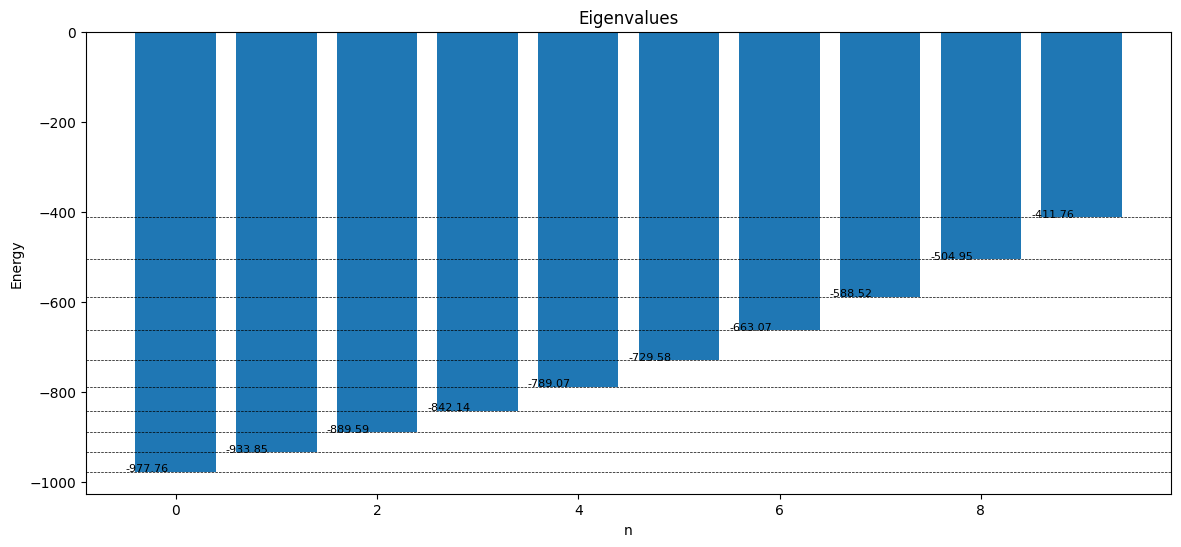

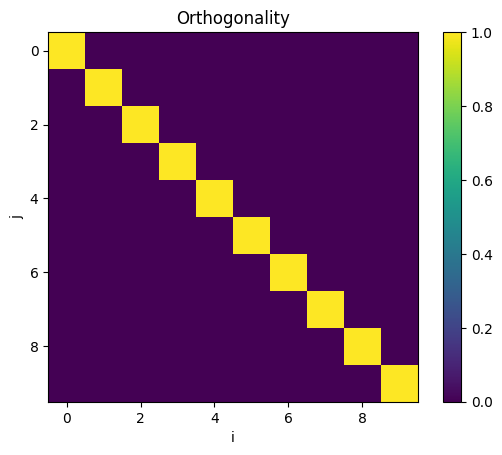

In [43]:
# Morse potential
def Morse_Potential(x):
    return 1000*(np.exp(-2*(x-1/2))-2*np.exp(-(x-1/2)))
solve_and_plot(Morse_Potential)

C:\Users\xsxwz\AppData\Local\Temp\ipykernel_29152\3016208603.py:3: RuntimeWarning: divide by zero encountered in divide
  return -1000/x


x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为349030.32938191574
第1个能级差为67930.60541884694
第2个能级差为24046.146049536765
第3个能级差为11178.625700918641
第4个能级差为6085.388850926542
第5个能级差为3673.760277944888
第6个能级差为2386.2138491370442
第7个能级差为1636.8016214707714
第8个能级差为1171.2049487204313


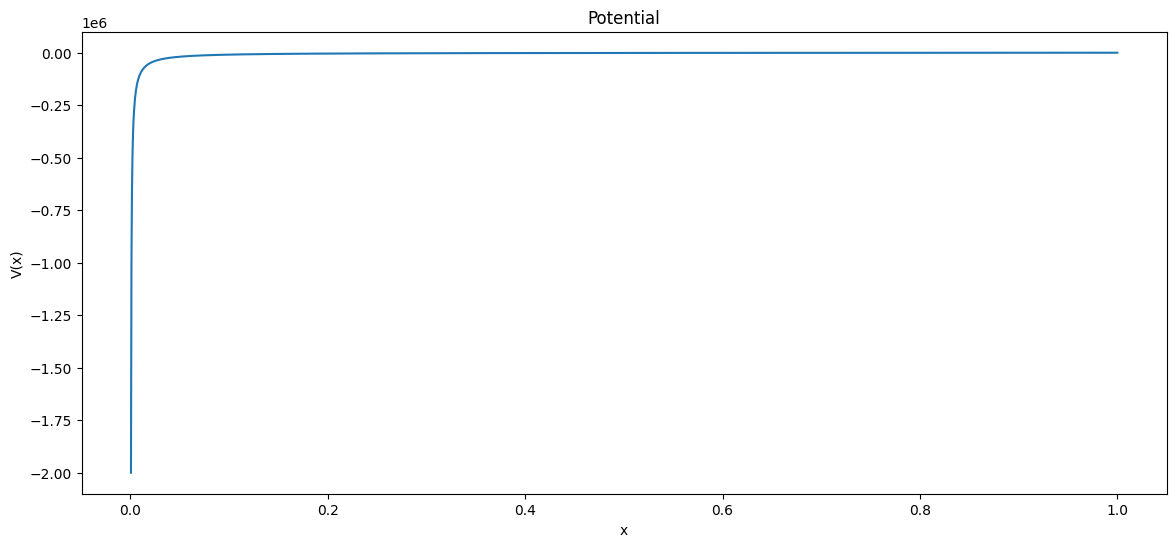

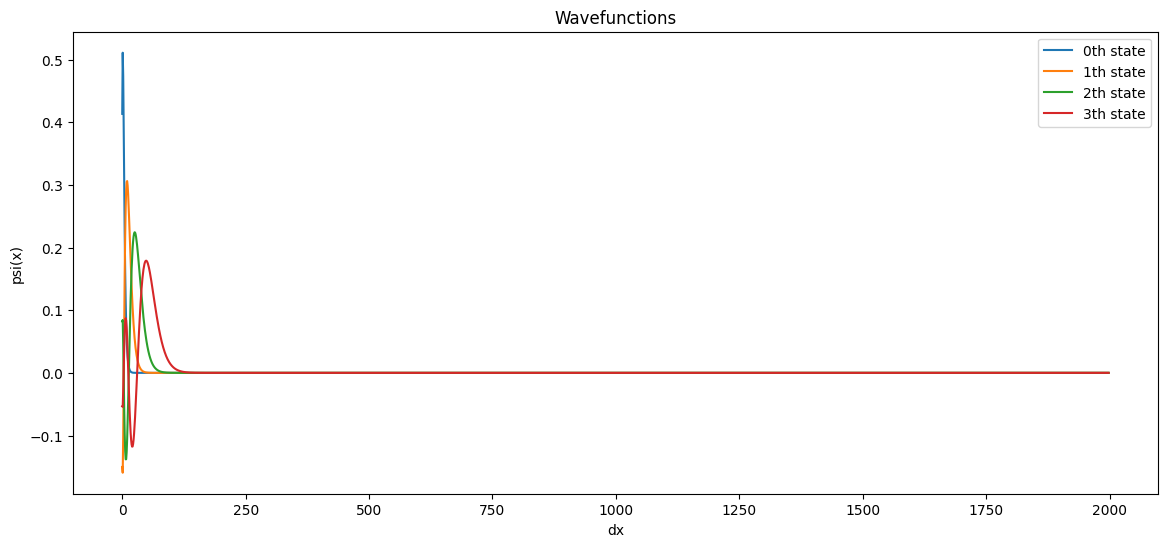

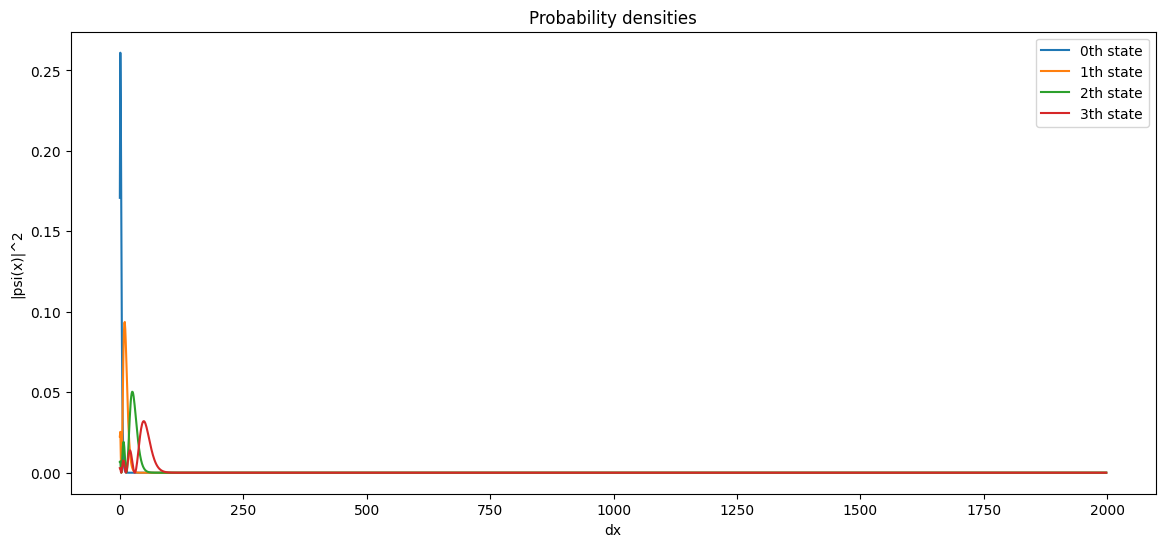

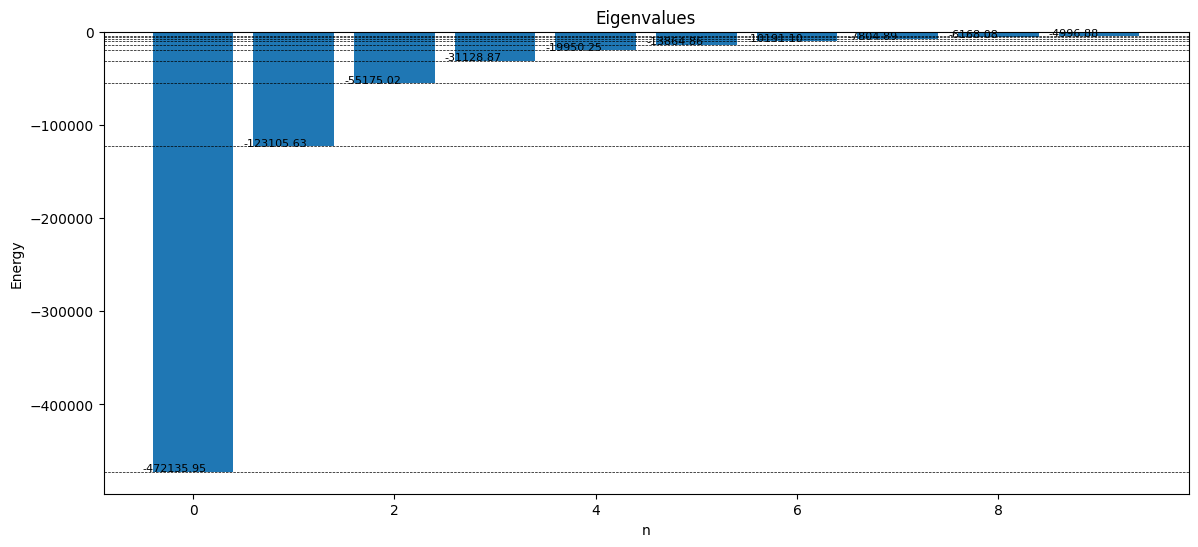

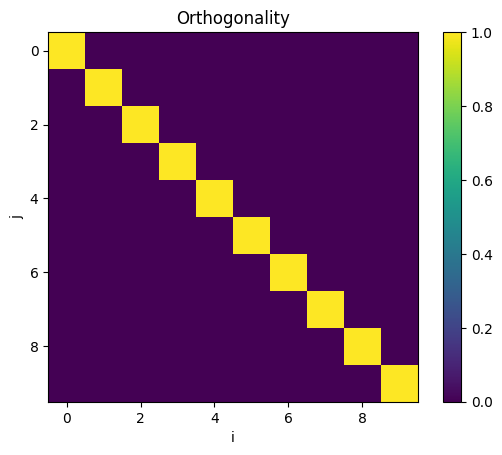

In [44]:
# Coulomb potential
def Coulomb_Potential(x):
    return -1000/x
solve_and_plot(Coulomb_Potential)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001
第0个能级差为43.201463979999204
第1个能级差为42.13206493073359
第2个能级差为42.893090694889395
第3个能级差为47.018226365759915
第4个能级差为54.43058367303357
第5个能级差为63.66747585701515
第6个能级差为73.51304987885715
第7个能级差为83.4793504168976
第8个能级差为93.44297931152454


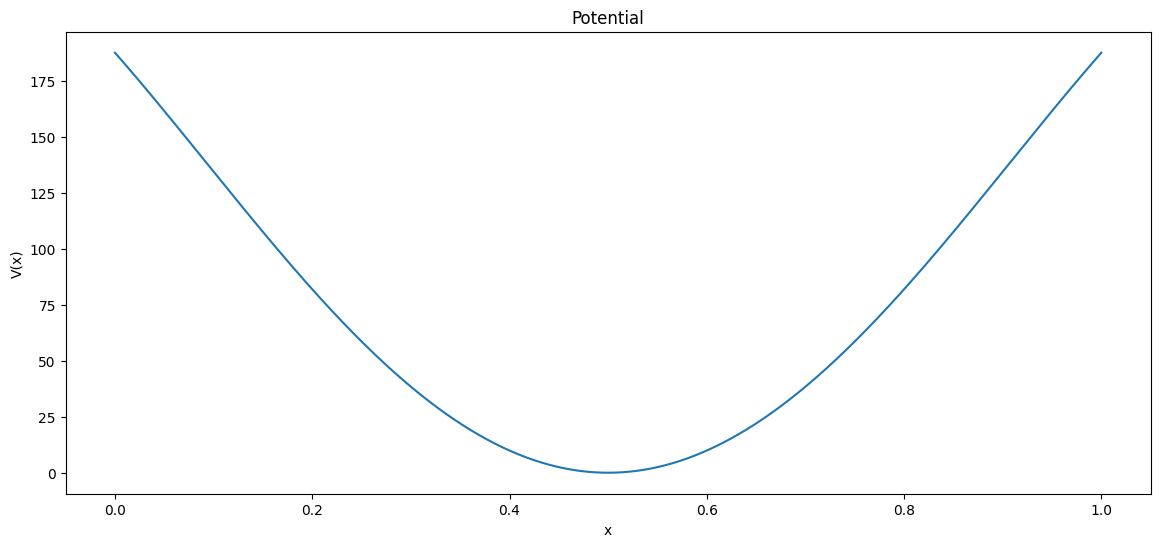

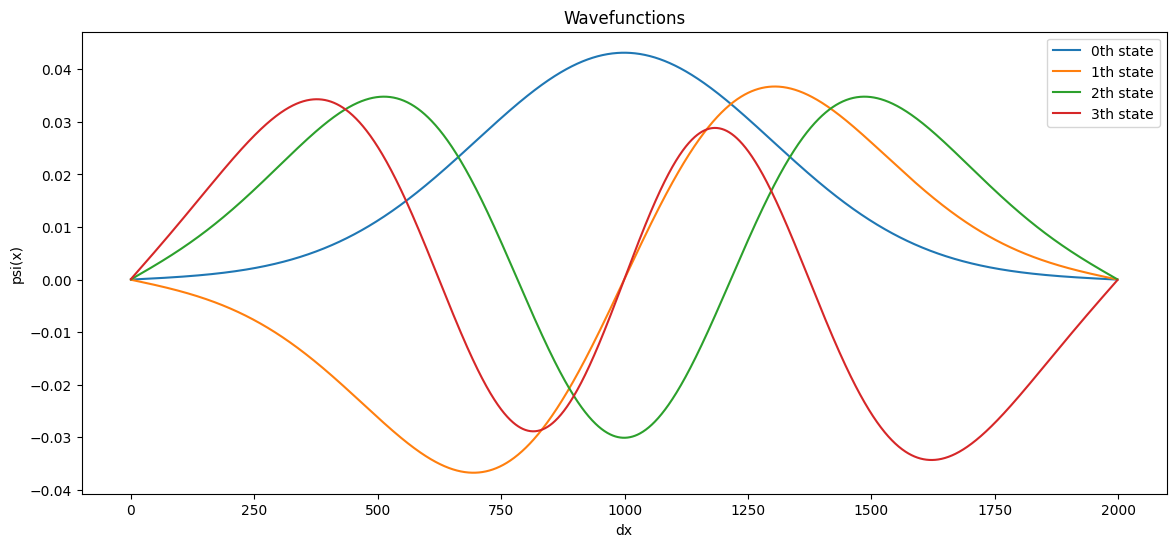

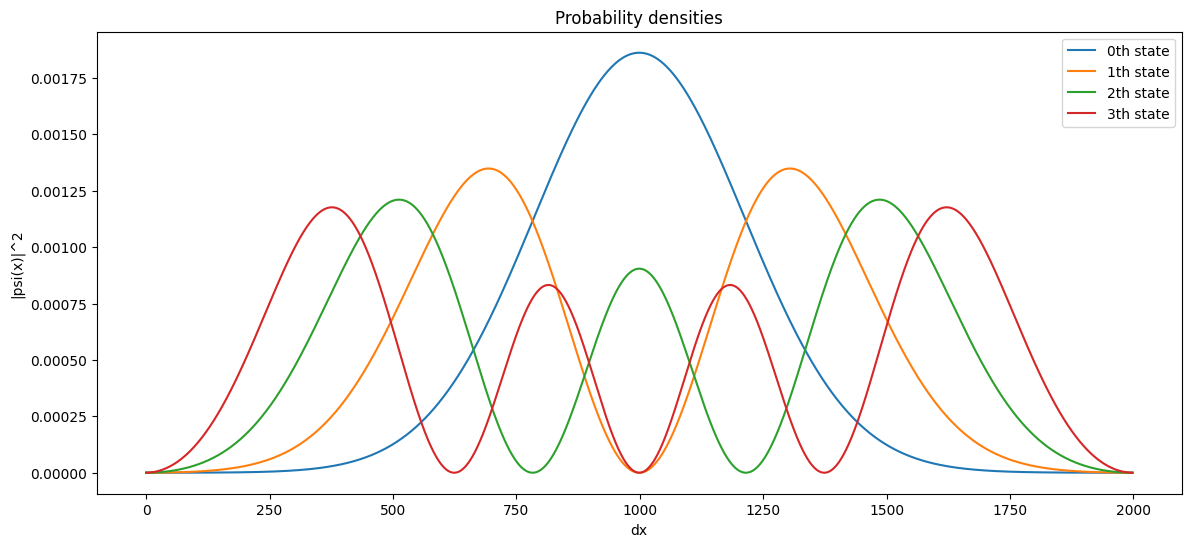

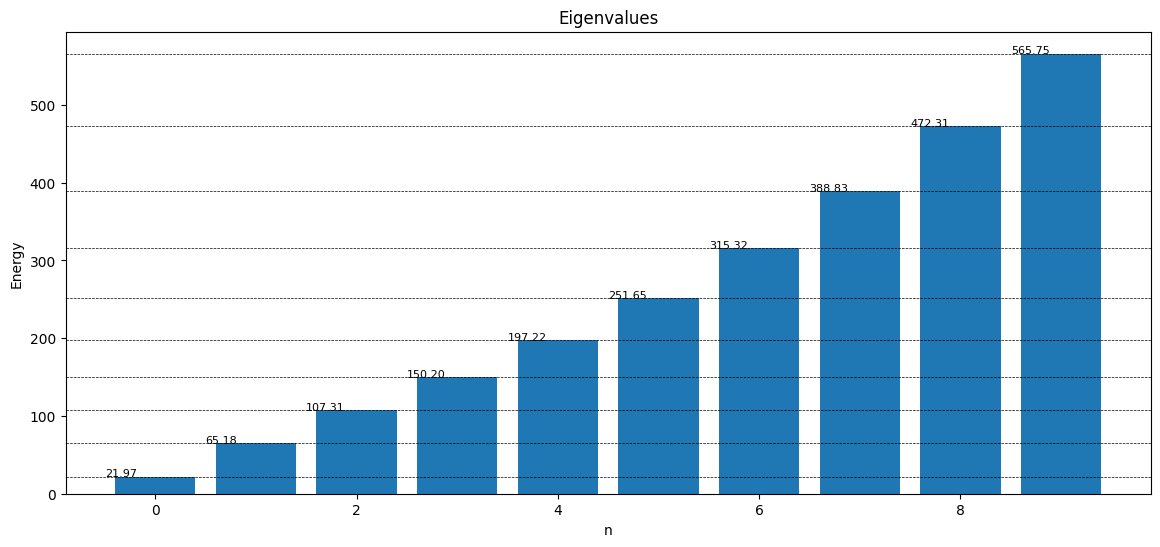

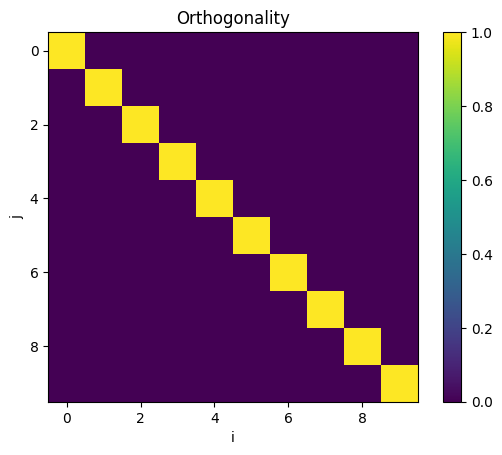

In [45]:
# finite square well
def Finite_Square_Well(x):
    return 1000*(x-1/2)**2-1000*(x-1/2)**4
solve_and_plot(Finite_Square_Well)